In [35]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [64]:
mnist = tf.keras.datasets.mnist # store dataset to var
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() # load dataset 

In [65]:
# normalize dataset pixel values by scaling it to between 0 and 1 
X_train = tf.keras.utils.normalize(X_train, axis=1) 
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [66]:
model = tf.keras.models.Sequential() # load sequential model

In [67]:
# defining sequential model with 3 hidden layers along with 1 input and output layer
model.add(tf.keras.layers.Flatten()) # input layer
model.add(tf.keras.layers.Dense(150, activation=tf.nn.relu)) # first hidden layer with activation function of ReLU
model.add(tf.keras.layers.Dropout(0.2)) # fraction of neurons to be zeroed out
model.add(tf.keras.layers.Dense(75, activation=tf.nn.sigmoid)) # second hidden layer with activation function of sigmoid
model.add(tf.keras.layers.Dropout(0.2)) # fraction of neurons to be zeroed out
model.add(tf.keras.layers.Dense(75, activation=tf.nn.relu)) # first hidden layer with activation function of ReLU
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer with activation function of softmax

In [77]:
# using Adam optimizer and loss function of Categorical Cross entropy
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [78]:
model.fit(X_train, Y_train, epochs=5) # fitting model with 5 epochs

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0702 - accuracy: 0.9785
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0639 - accuracy: 0.9794
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0586 - accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0541 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0481 - accuracy: 0.9844


In [79]:
value_loss, value_acc = model.evaluate(X_test, Y_test) 
print(value_loss, value_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9794
0.07389714568853378 0.9793999791145325


In [80]:
model.save("mnist_reader.model") 

INFO:tensorflow:Assets written to: mnist_reader.model\assets


In [81]:
new_model = tf.keras.models.load_model("mnist_reader.model/")

In [82]:
predictions = new_model.predict([X_test]) # store output predictions generated by model

313/313 [==============================] - 1s 2ms/step


Prediction:  0
Label:  0


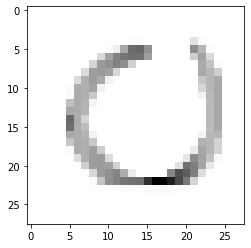

In [83]:
random_index = np.random.randint(1000)
print("Prediction: ", np.argmax(predictions[random_index]))
label = Y_test[random_index]
print("Label: ", label)
plt.imshow(X_test[random_index], cmap=plt.cm.binary)
plt.show()